### Part 2

Data:  Prepare a data analysis report that includes:

Data definition for each parameter including measurement units

Plan for missing data for each parameter (if needed)

Plan for additional parameters or data (if needed)

Any transformations necessary

Plan for separating

Visualization of data if possible

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
anime_df = pd.read_csv("anime.csv")

In [5]:
rating_df = pd.read_csv("rating.csv")

In [6]:
anime_rt_df = pd.merge(anime_df, rating_df, on = 'anime_id')

In [7]:
anime_rt_df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


Text(0, 0.5, 'Count')

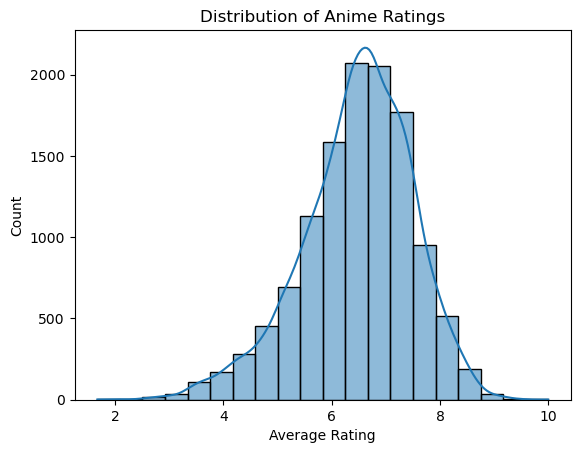

In [8]:
sns.histplot(anime_df['rating'], bins=20, kde=True)
plt.title("Distribution of Anime Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Count")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Movie'),
  Text(1, 0, 'TV'),
  Text(2, 0, 'OVA'),
  Text(3, 0, 'Special'),
  Text(4, 0, 'Music'),
  Text(5, 0, 'ONA')])

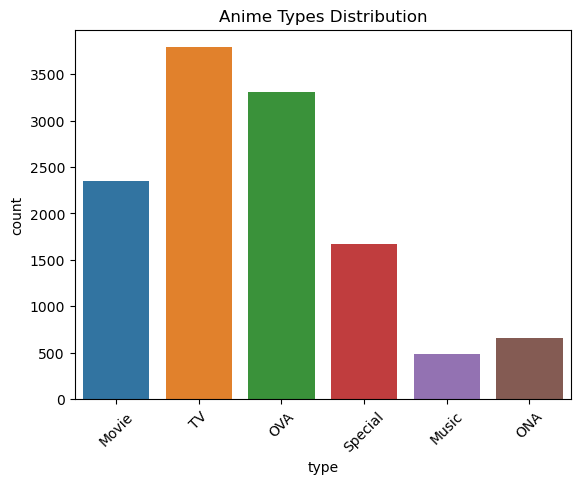

In [9]:
sns.countplot(data=anime_df, x='type')
plt.title("Anime Types Distribution")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Top 10 Anime Genres')

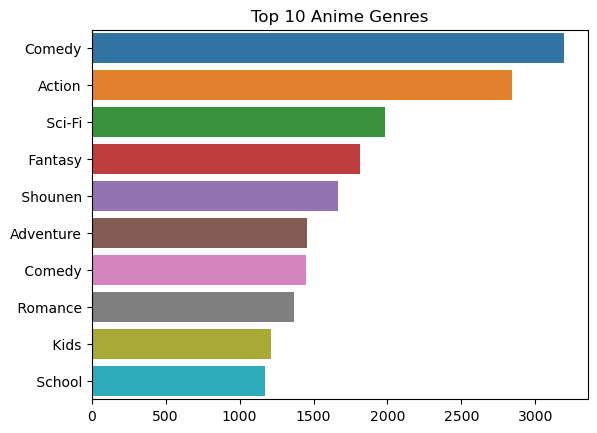

In [10]:
from collections import Counter
genres = anime_df['genre'].str.split(',').explode()
top_genres = Counter(genres).most_common(10)
sns.barplot(x=[g[1] for g in top_genres], y=[g[0] for g in top_genres])
plt.title("Top 10 Anime Genres")

In [11]:
anime_rt_df.isna().sum()

anime_id      0
name          0
genre       110
type          4
episodes      0
rating_x      6
members       0
user_id       0
rating_y      0
dtype: int64

In [12]:
anime_rt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813727 entries, 0 to 7813726
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   anime_id  int64  
 1   name      object 
 2   genre     object 
 3   type      object 
 4   episodes  object 
 5   rating_x  float64
 6   members   int64  
 7   user_id   int64  
 8   rating_y  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 596.1+ MB


In [13]:
anime_rt_df[anime_rt_df['type'] == 'TV']

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10
2200,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,10,10
2201,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,11,8
2202,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,12,9
2203,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,17,10
...,...,...,...,...,...,...,...,...,...
7689811,7808,Zukkoke Knight: Don De La Mancha,"Adventure, Comedy, Historical, Romance",TV,23,6.47,172,25856,4
7689812,7808,Zukkoke Knight: Don De La Mancha,"Adventure, Comedy, Historical, Romance",TV,23,6.47,172,48766,-1
7689813,7808,Zukkoke Knight: Don De La Mancha,"Adventure, Comedy, Historical, Romance",TV,23,6.47,172,49127,6
7689814,7808,Zukkoke Knight: Don De La Mancha,"Adventure, Comedy, Historical, Romance",TV,23,6.47,172,51693,7


##### Genre's that are not labeled.

In [40]:
anime_rt_df[anime_rt_df['type'].isna()]

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y


In [41]:
anime_rt_df.loc[(anime_rt_df['name'] == 'Steins;Gate 0') & (anime_rt_df['type'].isna()), 'type'] = 'TV'

In [16]:
anime_rt_df[anime_rt_df['episodes'] == 'Unknown']

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
7686348,32237,Burutabu-chan,"Comedy, Fantasy, Magic",TV,Unknown,5.00,37,12431,1
7686525,27551,Deko Boko Friends,"Comedy, Kids",TV,Unknown,7.14,61,48766,-1
7688629,21981,Pic-lele,Kids,TV,Unknown,6.33,59,48766,-1
7689759,33846,Yurugaro,"Comedy, Fantasy",Special,Unknown,4.74,153,13954,4
7689817,30484,Steins;Gate 0,"Sci-Fi, Thriller",TV,Unknown,NaN,60999,31437,9
7689818,30484,Steins;Gate 0,"Sci-Fi, Thriller",TV,Unknown,NaN,60999,37475,7
7689819,30484,Steins;Gate 0,"Sci-Fi, Thriller",TV,Unknown,NaN,60999,42372,9
7689820,30484,Steins;Gate 0,"Sci-Fi, Thriller",TV,Unknown,NaN,60999,45904,9


In [17]:
anime_rt_df[anime_rt_df['name'] == 'Steins;Gate 0']

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
7689817,30484,Steins;Gate 0,"Sci-Fi, Thriller",TV,Unknown,NaN,60999,31437,9
7689818,30484,Steins;Gate 0,"Sci-Fi, Thriller",TV,Unknown,NaN,60999,37475,7
7689819,30484,Steins;Gate 0,"Sci-Fi, Thriller",TV,Unknown,NaN,60999,42372,9
7689820,30484,Steins;Gate 0,"Sci-Fi, Thriller",TV,Unknown,NaN,60999,45904,9


In [18]:
anime_rt_df.loc[(anime_rt_df['name'] == 'Steins;Gate 0') & (anime_rt_df['episodes'] == 'Unknown'), 'episodes'] = 23

In [19]:
anime_rt_df[anime_rt_df['name'] == 'Steins;Gate 0']

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
7689817,30484,Steins;Gate 0,"Sci-Fi, Thriller",TV,23,NaN,60999,31437,9
7689818,30484,Steins;Gate 0,"Sci-Fi, Thriller",TV,23,NaN,60999,37475,7
7689819,30484,Steins;Gate 0,"Sci-Fi, Thriller",TV,23,NaN,60999,42372,9
7689820,30484,Steins;Gate 0,"Sci-Fi, Thriller",TV,23,NaN,60999,45904,9


In [20]:
anime_rt_df = anime_rt_df.dropna(subset=['genre'])

In [21]:
anime_rt_df.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating_x    6
members     0
user_id     0
rating_y    0
dtype: int64

In [22]:
anime_rt_df[anime_rt_df['rating_x'].isna()]

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
7689817,30484,Steins;Gate 0,"Sci-Fi, Thriller",TV,23,NaN,60999,31437,9
7689818,30484,Steins;Gate 0,"Sci-Fi, Thriller",TV,23,NaN,60999,37475,7
7689819,30484,Steins;Gate 0,"Sci-Fi, Thriller",TV,23,NaN,60999,42372,9
7689820,30484,Steins;Gate 0,"Sci-Fi, Thriller",TV,23,NaN,60999,45904,9
7689821,33674,No Game No Life Movie,"Adventure, Comedy, Ecchi, Fantasy, Game, Super...",Movie,1,NaN,32041,43480,-1
7689822,9488,Cencoroll 2,"Action, Sci-Fi",Movie,1,NaN,15181,43873,7


In [23]:
anime_rt_df.loc[(anime_rt_df['name'] == 'Steins;Gate 0') & (anime_rt_df['rating_x'].isna()), 'rating_x'] = 8.54

In [24]:
anime_rt_df.loc[(anime_rt_df['name'] == 'No Game No Life Movie') & (anime_rt_df['rating_x'].isna()), 'rating_x'] = 6.79

In [25]:
anime_rt_df.loc[(anime_rt_df['name'] == 'Cencoroll 2') & (anime_rt_df['rating_x'].isna()), 'rating_x'] = 7.19

In [26]:
anime_rt_df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [27]:
anime_rt_df = anime_rt_df[anime_rt_df['episodes'] != 'Unknown']

In [28]:
anime_rt_df['episodes'].value_counts()

1      1771175
12     1734393
13      953125
26      542351
24      536798
        ...   
475          1
83           1
71           1
132          1
283          1
Name: episodes, Length: 184, dtype: int64

In [29]:
cleaned_df = anime_rt_df[anime_rt_df['rating_y'] != -1]

In [30]:
# Filter for TV anime only
tv_anime = cleaned_df[cleaned_df['type'] == 'TV']

# Further filter for anime with members > 100,000
popular_tv_anime = tv_anime[tv_anime['members'] > 100000]

In [31]:
print(f"After popularity filter: {popular_tv_anime.shape}")

After popularity filter: (3000924, 9)


In [32]:
sample_1000 = popular_tv_anime.sample(n = 1000, random_state = 20)

### Part 3: Models

#### Supervised Learning: Rating Prediction(Regression)

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [43]:
# Feature engineering
# Feature Engineering
# Convert genre strings into dummy variables (one-hot encoding)
genre_dummies = sample_1000['genre'].str.get_dummies(sep=',')

# Convert type to dummy variables (though we only have TV now)
type_dummy = pd.get_dummies(sample_1000['type'], prefix='type')

# Select numerical features
numerical_features = sample_1000[['episodes', 'members', 'rating_x']]

# Combine all features
X = pd.concat([genre_dummies, type_dummy, numerical_features], axis=1)
y = sample_1000['rating_y']  # Target variable (user ratings)

In [44]:
# Train-test split (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, 
                          max_depth=10, 
                          random_state=42,
                          min_samples_split=5)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [45]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Feature importance
importances = pd.DataFrame({'feature':X.columns,'importance':rf.feature_importances_})\
               .sort_values('importance',ascending=False)

In [46]:
print(f"Mean Squared Error: {mse:.2f}")
print("\nTop 10 Feature Importances:")
print(importances.head(10).to_string(index=False))

Mean Squared Error: 1.96

Top 10 Feature Importances:
 feature  importance
rating_x    0.469334
 members    0.178327
episodes    0.062803
  Comedy    0.015848
 Mystery    0.015568
   Drama    0.011985
 Fantasy    0.011830
 Romance    0.010913
 Romance    0.010877
   Drama    0.010794


#### Kmeans

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare the data
# Convert genre to dummy variables and select features
genre_dummies = sample_1000['genre'].str.get_dummies(',')
X = pd.concat([sample_1000[['members', 'episodes', 'rating_x']], genre_dummies], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

D:\Python Projects\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\Python Projects\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\Python Projects\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\Python Projects\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there a

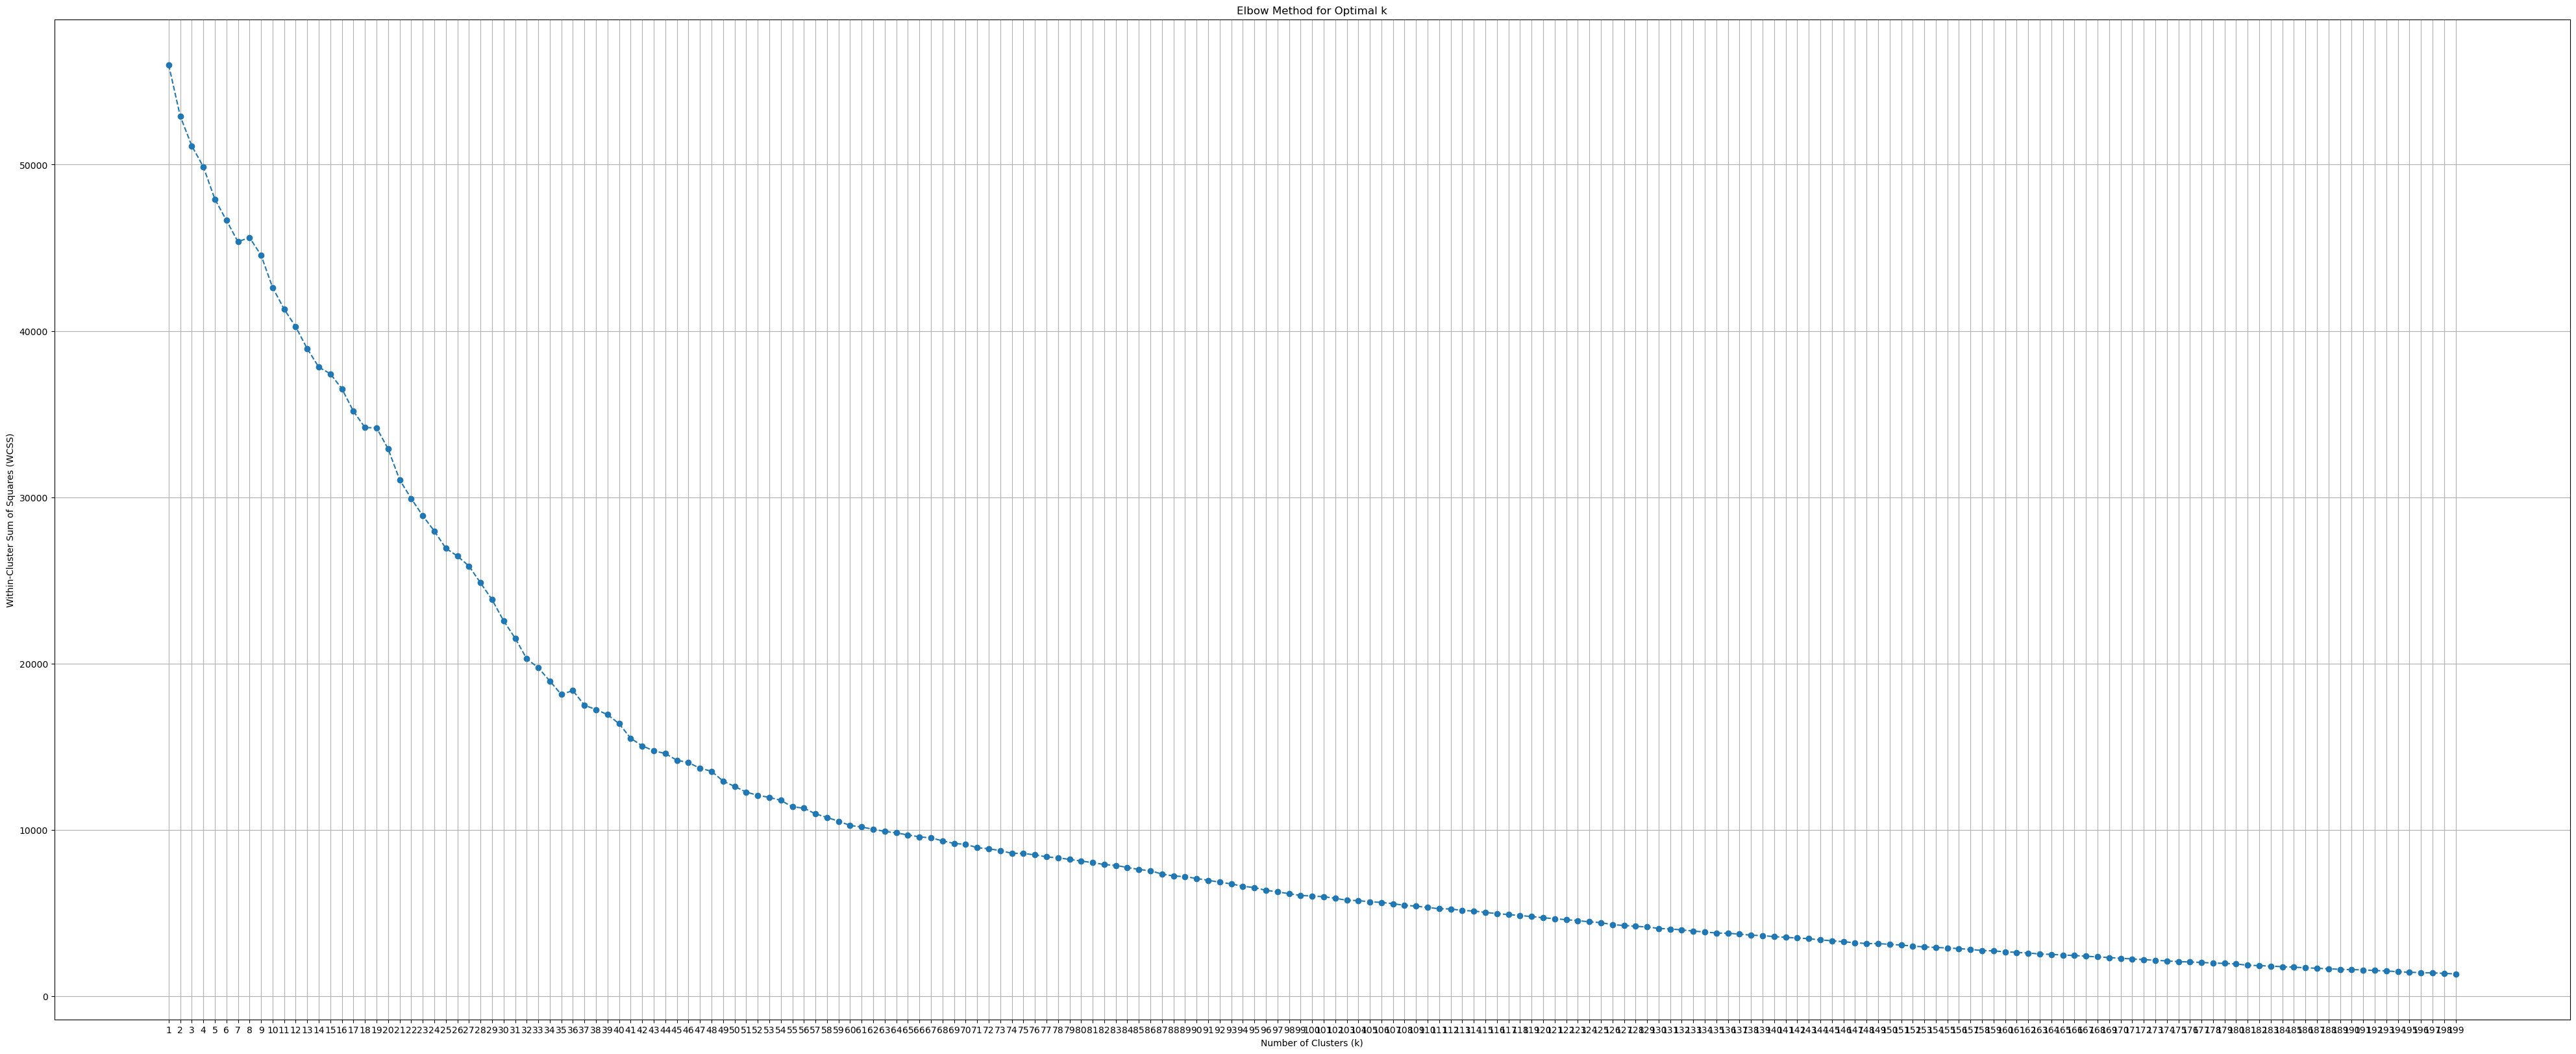

In [48]:
# Initialize variables for elbow method
wcss = []  # Within-cluster sum of squares
k_range = range(1, 200)  # Testing k from 1 to 10

# Compute WCSS for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(50, 20))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid()
plt.show()



In [49]:
optimal_k = 62  # Change this based on your elbow plot observation
print(f"Optimal number of clusters: {optimal_k}")

# Fit K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=20)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to your DataFrame
sample_1000['cluster'] = clusters

# Analyze the clusters
cluster_profile = sample_1000.groupby('cluster').agg({
    'members': 'mean',
    'episodes': 'mean',
    'rating_x': 'mean'
}).round(1)

# Print cluster profiles
print("\nCluster Profiles:")
print(cluster_profile)

# Print top genres in each cluster
print("\nTop Genres by Cluster:")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    top_genres = sample_1000[sample_1000['cluster'] == cluster]['genre']\
        .str.split(',').explode().value_counts().head(5)
    print(top_genres)

Optimal number of clusters: 62

Cluster Profiles:
          members       episodes  rating_x
cluster                                   
0        196336.8  1.985944e+116       7.9
1        722456.2   2.711393e+36       8.9
2        298416.2   5.912519e+79       8.4
3        395821.7   1.126259e+22       7.9
4        562962.0   3.030303e+16       8.8
...           ...            ...       ...
57       212122.8   4.040408e+57       8.0
58       184846.8   7.789008e+31       7.7
59       410218.6   1.101928e+20       7.6
60       223662.6   2.805612e+34       7.6
61       257296.8   8.207008e+29       7.5

[62 rows x 3 columns]

Top Genres by Cluster:

Cluster 0:
Comedy            61
 School           42
 Romance          30
 Slice of Life    28
 Supernatural     13
Name: genre, dtype: int64

Cluster 1:
Action        19
 Adventure    19
 Drama        19
 Fantasy      19
 Magic        19
Name: genre, dtype: int64

Cluster 2:
Drama             41
 Slice of Life    28
 Supernatural     28
 Ro

D:\Python Projects\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


#### Collaborative Filtering

In [50]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import cross_validate

# Prepare data for Surprise
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(sample_1000[['user_id', 'anime_id', 'rating_y']], reader)

# User-based collaborative filtering
sim_options = {'name': 'cosine', 'user_based': True}
algo = KNNBasic(k=20, sim_options=sim_options)

# Cross-validation - modified to handle results properly
cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

# Train on full dataset
trainset = data.build_full_trainset()
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.4964  1.3069  1.4897  1.4310  0.0878  
MAE (testset)     1.1367  1.0122  1.1430  1.0973  0.0602  
Fit time          0.01    0.01    0.00    0.01    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [51]:
print("""
COLLABORATIVE FILTERING RESULTS
------------------------------""")
print(f"Average RMSE across folds: {cv_results['test_rmse'].mean():.2f}")
print(f"Average MAE across folds: {np.mean(cv_results['test_mae']):.2f}")
print(f"Fit time: {np.mean(cv_results['fit_time']):.2f}s")
print(f"Test time: {np.mean(cv_results['test_time']):.2f}s")

# Example predictions
test_user = sample_1000['user_id'].iloc[0]
test_anime = sample_1000['anime_id'].iloc[0]
pred = algo.predict(test_user, test_anime).est
actual = sample_1000[(sample_1000['user_id'] == test_user) & 
                    (sample_1000['anime_id'] == test_anime)]['rating_y'].values[0]
print(f"\nExample Prediction:")
print(f"User {test_user} on Anime {test_anime}:")
print(f"Actual rating: {actual} | Predicted: {pred:.1f}")


COLLABORATIVE FILTERING RESULTS
------------------------------
Average RMSE across folds: 1.43
Average MAE across folds: 1.10
Fit time: 0.01s
Test time: 0.00s

Example Prediction:
User 51514 on Anime 12413:
Actual rating: 10 | Predicted: 9.0


### Part 4

In [59]:
# Consolidate similar genres
def consolidate_genres(genre_str):
    if pd.isna(genre_str):
        return "Unknown"
    genres = genre_str.split(',')
    consolidated = []
    for g in genres:
        g = g.strip()
        if g in ['Comedy', 'Parody']:
            consolidated.append('Comedy')
        elif g in ['Drama', 'Tragedy']:
            consolidated.append('Drama')
        elif g in ['Shounen', 'Shoujo']:
            consolidated.append('Demographic')
        else:
            consolidated.append(g)
    return ','.join(list(set(consolidated)))


In [60]:
from sklearn.metrics import make_scorer, mean_squared_error

sample_1000['genre_consolidated'] = sample_1000['genre'].apply(consolidate_genres)
genre_dummies = sample_1000['genre_consolidated'].str.get_dummies(',')
type_dummies = pd.get_dummies(sample_1000['type'], prefix='type')
numerical_features = sample_1000[['episodes', 'members', 'rating_x']]
X = pd.concat([genre_dummies, type_dummies, numerical_features], axis=1)
y = sample_1000['rating_y']



In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, 
                          max_depth=20, 
                          random_state=42,
                          min_samples_split=5)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [64]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Feature importance
importances = pd.DataFrame({'feature':X.columns,'importance':rf.feature_importances_})\
               .sort_values('importance',ascending=False)

print(f"Mean Squared Error: {mse:.2f}")
print("\nTop 10 Feature Importances:")
print(importances.head(10).to_string(index=False))

Mean Squared Error: 2.11

Top 10 Feature Importances:
      feature  importance
     rating_x    0.439310
      members    0.185923
     episodes    0.068948
      cluster    0.043809
      Mystery    0.017473
      Romance    0.015462
        Drama    0.014804
Slice of Life    0.014747
 Supernatural    0.013525
       School    0.013358


In [62]:
from surprise import KNNWithMeans, SVD
from surprise.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'k': [20, 30, 50],
    'sim_options': {
        'name': ['msd', 'cosine', 'pearson'],
        'user_based': [True, False]
    },
    'min_k': [1, 5]
}

# Grid search
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=3, n_jobs=-1)
gs.fit(data)

# Best model
best_knn = gs.best_estimator['rmse']
cross_validate(best_knn, data, measures=['rmse'], cv=3, verbose=True)

# Try matrix factorization as comparison
svd = SVD()
cross_validate(svd, data, measures=['rmse'], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.4173  1.4386  1.4271  1.4277  0.0087  
Fit time          0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.4639  1.3429  1.3665  1.3911  0.0524  
Fit time          0.01    0.01    0.01    0.01    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([1.46393543, 1.34286789, 1.36649242]),
 'fit_time': (0.012560129165649414,
  0.009973526000976562,
  0.010988473892211914),
 'test_time': (0.001993417739868164,
  0.0019943714141845703,
  0.0009970664978027344)}